### Data exploration

##### Import the neccessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers import RandomFlip, RandomRotation
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

##### Set the constant values (store it in a variable)

In [2]:
# Save the image size,batch_size, image and channel
image_size = 256 
batch_size = 32 # One batch is 32 images 
channel = 3 # it is an RGB image

In [4]:
# How many pixels in one image
pixel = 256 * 256
pixel # We have 65536 number of pixels in an image

65536

We will use "image_dataset_from_directory" api to load all images in tensorflow dataset.

In [3]:
# Loading the datsaet through keras preprocessing
data = tf.keras.preprocessing.image_dataset_from_directory(
    "potato_plant",
    shuffle = True,
    image_size = (image_size, image_size),
    batch_size = batch_size  
)

Found 2152 files belonging to 3 classes.


In [6]:
# Check the class names
class_names = data.class_names
class_names

['Potato___Early_Blight', 'Potato___Healthy', 'Potato___Late_Blight']

In [7]:
len(data) # we have 68 baches in our  dataset ; one bache has 32 images

68

In [10]:
total_images = 68*32 # Generally we have 2152 images but here it is showing us less number becouse the last images are not perfect to be counted.
total_images

2176

In [11]:
# Check how many images is there in each batch, the size and channel of each image
# 0, 1, 2 represents the three potato classnames, ['Potato___Early_Blight', 'Potato___Healthy', 'Potato___Late_Blight']
for image_batch, label_batch in data.take(1):
    print(image_batch.shape)
    print(label_batch.numpy()) # We are changing tensor to numpy array

(32, 256, 256, 3)
[2 2 0 2 0 2 1 0 2 0 2 0 0 2 2 1 0 2 2 1 2 2 2 0 2 2 0 2 2 2 0 0]


As we can see from above output, each element in the dataset is a tuple. First element is a batch of 32 elements of images. Second element is a batch of 32 elements of class labels

In [12]:
# Let's display the first image
for image_batch, label_batch in data.take(1):
    print(image_batch[0]) # Here the datatype is tensor, we didn't change it into numpy package

tf.Tensor(
[[[113. 110. 121.]
  [144. 141. 152.]
  [162. 159. 170.]
  ...
  [120. 114. 126.]
  [150. 144. 156.]
  [133. 127. 139.]]

 [[125. 122. 133.]
  [142. 139. 150.]
  [139. 136. 147.]
  ...
  [136. 130. 142.]
  [119. 113. 125.]
  [139. 133. 145.]]

 [[130. 127. 138.]
  [170. 167. 178.]
  [134. 131. 142.]
  ...
  [152. 146. 158.]
  [ 98.  92. 104.]
  [128. 122. 134.]]

 ...

 [[195. 191. 205.]
  [183. 179. 193.]
  [189. 185. 199.]
  ...
  [174. 172. 185.]
  [181. 179. 192.]
  [177. 175. 188.]]

 [[190. 186. 200.]
  [186. 182. 196.]
  [196. 192. 206.]
  ...
  [168. 166. 179.]
  [170. 168. 181.]
  [165. 163. 176.]]

 [[216. 212. 226.]
  [197. 193. 207.]
  [188. 184. 198.]
  ...
  [181. 179. 192.]
  [176. 174. 187.]
  [168. 166. 179.]]], shape=(256, 256, 3), dtype=float32)


In [13]:
# Let's check the shape of this individual image
for image_batch, label_batch in data.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


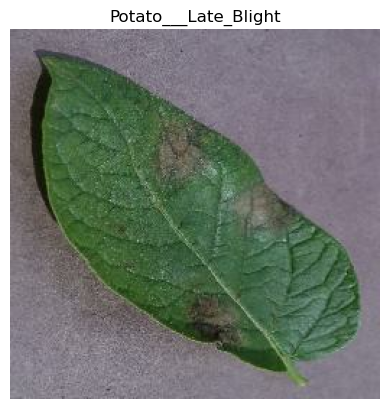

In [22]:
# Let's visualize a single image
for image_batch, label_batch in data.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]]) # Put the title of the image
    plt.axis("off")

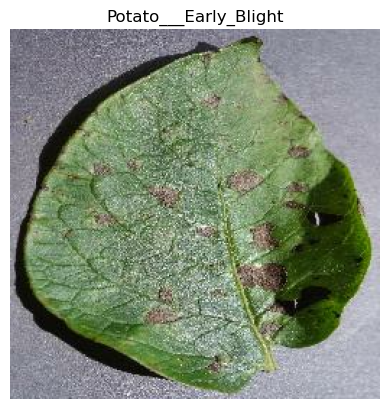

In [23]:
# Since it is shuffling everytime when we run the cell again 
# there will be another image displayed just like this
for image_batch, label_batch in data.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]]) # Put the title of the image
    plt.axis("off")

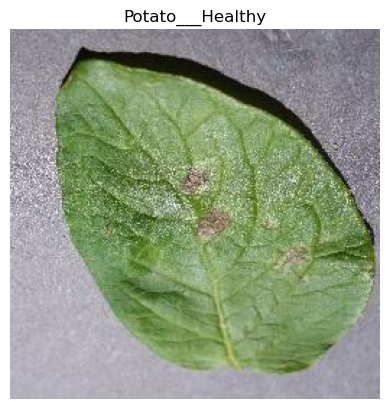

In [29]:
# Since it is shuffling everytime when we run the cell again 
# there will be another image displayed just like this
for image_batch, label_batch in data.take(1):
    plt.imshow(image_batch[1].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]]) # Put the title of the image
    plt.axis("off")

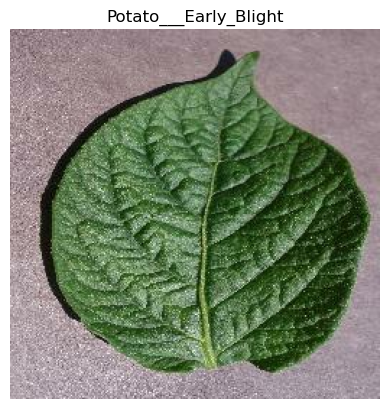

In [31]:
# Since it is shuffling everytime when we run the cell again 
# there will be another image displayed just like this
for image_batch, label_batch in data.take(1):
    plt.imshow(image_batch[1].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]]) # Put the title of the image
    plt.axis("off")

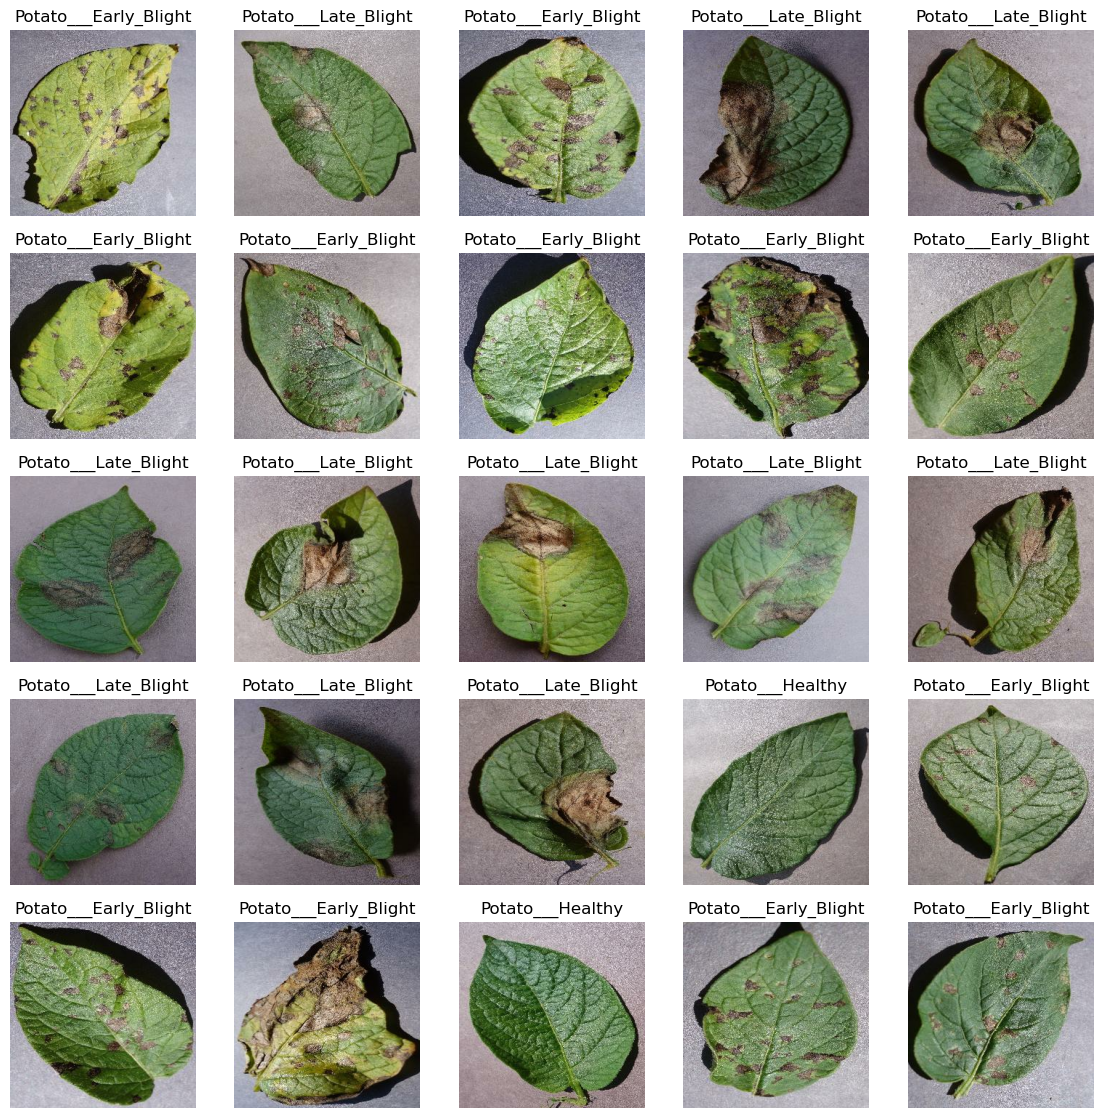

In [35]:
# let's display the first 25 images from the first batch
plt.figure(figsize = (14, 14))
for image_batch, label_batch in data.take(1):
    for i in range(25):
        ax = plt.subplot(5,5, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")